<a href="https://colab.research.google.com/github/AndresUrregoAngel/Python/blob/master/ML/Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main idea is walk throughout the different matplotlib figures to get in shape how to visualize data for ML purposes.

The first example is based on the Artist layer of matlib

In [0]:
# Histogram

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import numpy as np

fig = Figure()
canvas = FigureCanvas(fig)

x = np.random.randn(10000)
ax = fig.add_subplot(111) # the 111 breaks down as 1 row , 1 column and first cell for the location of the new axis

ax.hist(x, 100)


ax.set_title('Normal distribution with $\mu=0, \sigma=1$')
fig.savefig('matplotlib_histogram.png') # Stores lcoally
print(x)
print(x.max(),x.mean())

[-0.0339767  -1.34415726  0.0347318  ... -0.70536867 -0.08689197
  0.10911267]
4.604092390714313 0.006710846330558527


  Scripting Layer

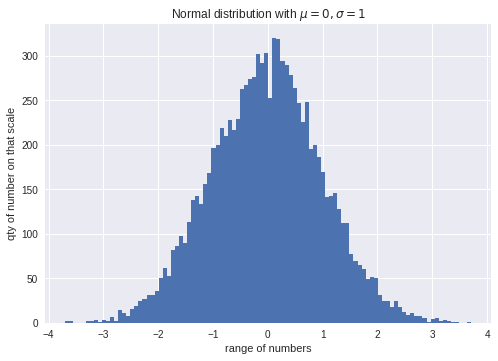

In [0]:
import matplotlib.pyplot as plt


x = np.random.randn(10000)
plt.hist(x, 100)
plt.title('Normal distribution with $\mu=0, \sigma=1$')
plt.xlabel('range of numbers')
plt.ylabel('qty of number on that scale')
plt.show()

pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

grouping: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

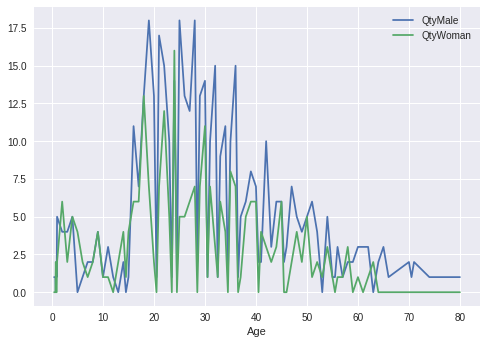

In [97]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/AndresUrregoAngel/Python_QuickCourse/master/Data/titanic.csv')

dfsex = df[['Sex','Age']]

# Filer by sex
dfmale  = dfsex.loc[dfsex['Sex'] == 'male']
dfwoman  = dfsex.loc[dfsex['Sex'] == 'female']

# Grouping

dfmale.columns =['QtyMale','Age']  # I need to change the column name before passed by the grouping
dfmaleg = dfmale.groupby('Age').count()

dfwoman.columns =['QtyWoman','Age']  # I need to change the column name before passed by the grouping
dfwomang = dfwoman.groupby('Age').count()


# Get df for figures
dfg = pd.concat([dfmaleg,dfwomang], axis=1)
dfg['QtyMale'].fillna(0, inplace=True)
dfg['QtyWoman'].fillna(0, inplace=True)

dfg.plot(kind='line')


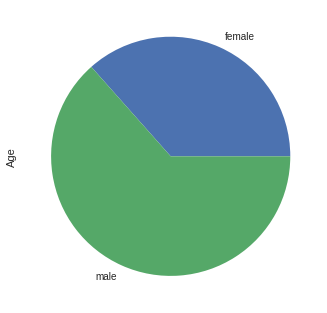

In [106]:
dfsex = df.groupby('Sex').count()

dfsex['Age'].plot(kind='pie')